# Project Title

 ## Heart Disease Prediction

---

## Author

**Muhammad Haweras**

📧 [haweras.work@gmail.com](mailto:haweras.work@gmail.com)

## About Dataset
### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `dataset` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results) `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute

### Acknowledgements
#### Creators:
Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

<hr>

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

import warnings #to ignore warnings
warnings.filterwarnings('ignore')


### Load the dataset

In [2]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

## Explotary Data Analysis(EDA)
### Explore each column

In [74]:
df.fbs.unique()

array([True, False], dtype=object)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
df.shape

(920, 16)

Let's explore age column

In [5]:
df['age'].min(), df['age'].max()

(np.int64(28), np.int64(77))

<Axes: xlabel='age', ylabel='Count'>

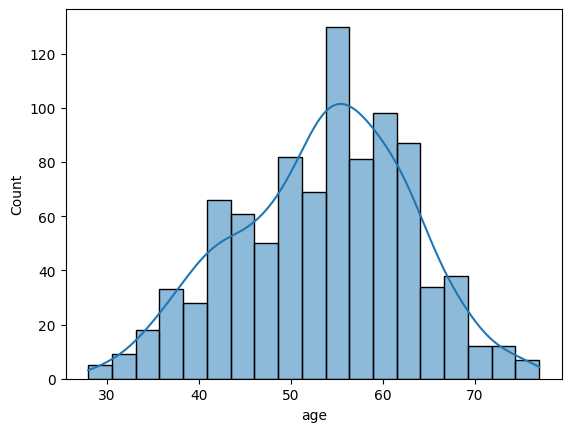

In [6]:
sns.histplot(df['age'], kde=True)

Mean of age: 53.51086956521739
Median of age: 54.0
Mode of age: 54


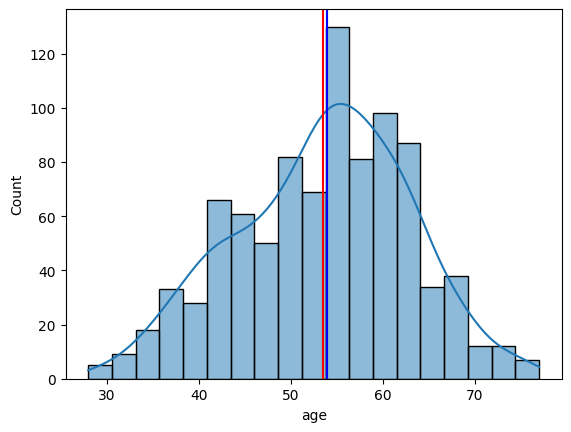

In [10]:
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline (df ['age'].median (), color='green')
plt.axvline(df ['age'].mode()[0], color='blue')

print("Mean of age:", df['age'].mean())
print("Median of age:", df['age'].median())
print("Mode of age:", df['age'].mode()[0])

Let's explore age based gender distribution

In [11]:
fig = px.histogram(data_frame=df, x='age', color='sex', title='Age Distribution by Sex')
fig.show()

---

In [12]:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [13]:
gender_counts = df['sex'].value_counts(normalize=True) * 100
print("Percentage of each gender:")
print(gender_counts.round(2))

Percentage of each gender:
sex
Male      78.91
Female    21.09
Name: proportion, dtype: float64


In [14]:
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

* Exploring dataset Column

In [15]:
# deal with dataset col

df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [16]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

### Distribution of dataset by sex

In [17]:
fig = px.bar(df, x='dataset', color='sex')
fig.show()

In [18]:
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

### Age Distribution Across Datasets

In [19]:
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

In [20]:
print("Mean:\n", df.groupby('dataset')['age'].mean())
print("\nMedian:\n", df.groupby('dataset')['age'].median())
print("\nMode:\n", df.groupby('dataset')['age'].agg(lambda x: x.mode().iloc[0]))

Mean:
 dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64

Median:
 dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64

Mode:
 dataset
Cleveland        58
Hungary          54
Switzerland      61
VA Long Beach    62
Name: age, dtype: int64


Let's explore `cp` column:

In [21]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [22]:
fig = px.histogram(df, x='age', color='cp')
fig.show()

<Axes: xlabel='cp', ylabel='count'>

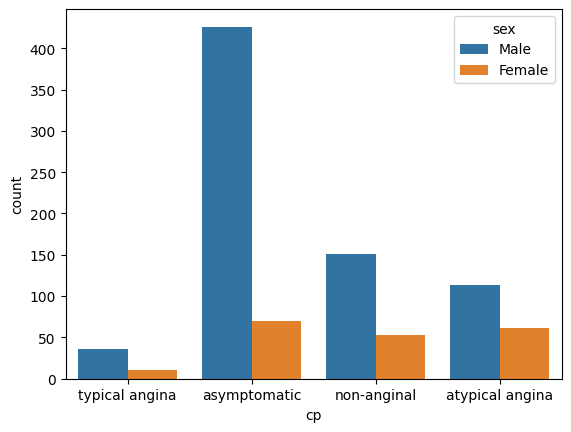

In [23]:
sns.countplot(df, x='cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

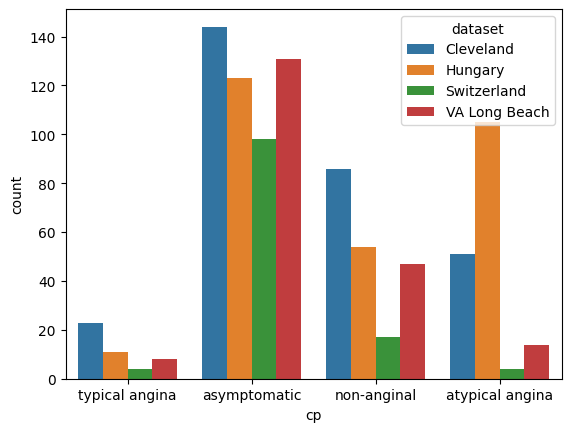

In [24]:
sns.countplot(df, x='cp', hue='dataset')

### Outputs

* The minimum age of person with heart disease is 27
* The maximum age of person with heart disease is 27
* Most of the people get heart disease at the age of 50-60
* Highest number of patients from Cleveland (304) and lowest from Switzerland(123)
    - Highest no. of females from Cleveland (97) and lowest from VA Long Beach (10)
    - Highest no. of males (212) from Hungary and lowest from Switzerland (113)
* Mean, Median, Mode Observation about `dataset` column grouped by `age`:
    -  `Mean` : <br>
       Cleveland        54.351974 <br>
       Hungary          47.894198 <br>
       Switzerland      55.317073 <br>
       VA Long Beach    59.350000 <br>
    - `Median` : <br>
        Cleveland        55.5 <br>
        Hungary          49.0 <br>
        Switzerland      56.0 <br>
        VA Long Beach    60.0 <br>
    - `Mode` : <br>
        Cleveland        58 <br>
        Hungary          54 <br>
        Switzerland      61 <br>
        VA Long Beach    62<br>
* `cp` column Observations:
   - Highest cp type: asymtotic agina (496)
   - Lowest cp type:  typical agina (46)
      
       

Let's explore `trestbps` (blood pressure) column:
- Normal value of blood pressure is 120/80 mmHg

In [25]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

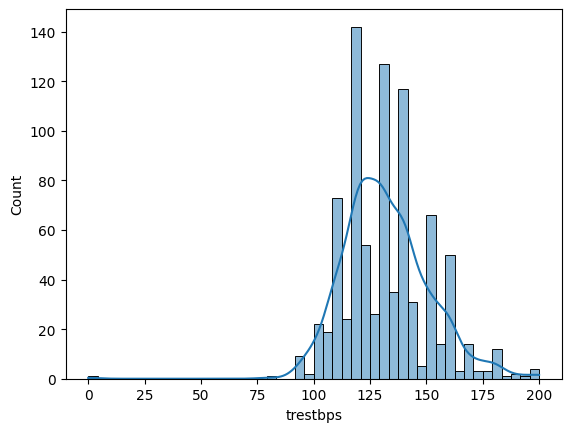

In [26]:
sns.histplot(df['trestbps'], kde=True)

### Lets explore chol column

In [27]:
df['chol'].describe()

count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64

<Axes: xlabel='chol', ylabel='Count'>

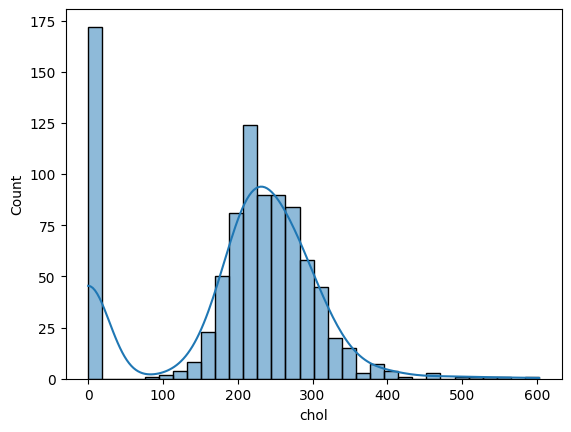

In [28]:
sns.histplot(df['chol'], kde=True)

### Desciptive Statistics and Histplot of remaining Cols


📊 Descriptive Statistics for 'fbs':
count       830
unique        2
top       False
freq        692
Name: fbs, dtype: object


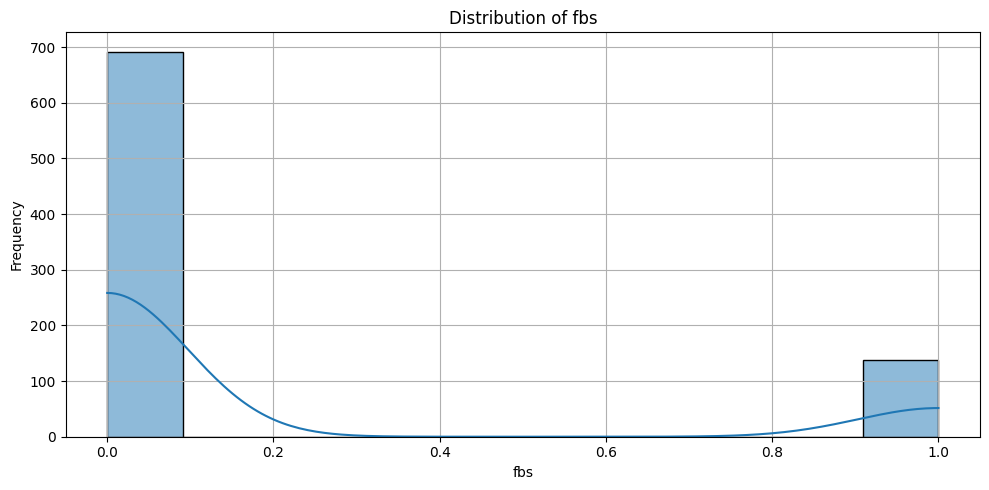


📊 Descriptive Statistics for 'restecg':
count        918
unique         3
top       normal
freq         551
Name: restecg, dtype: object


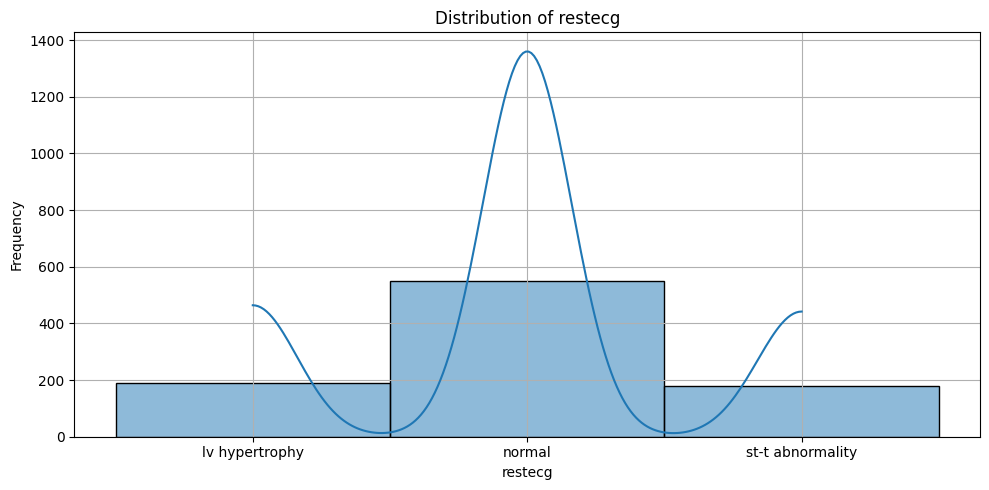


📊 Descriptive Statistics for 'thalch':
count    865.000000
mean     137.545665
std       25.926276
min       60.000000
25%      120.000000
50%      140.000000
75%      157.000000
max      202.000000
Name: thalch, dtype: float64


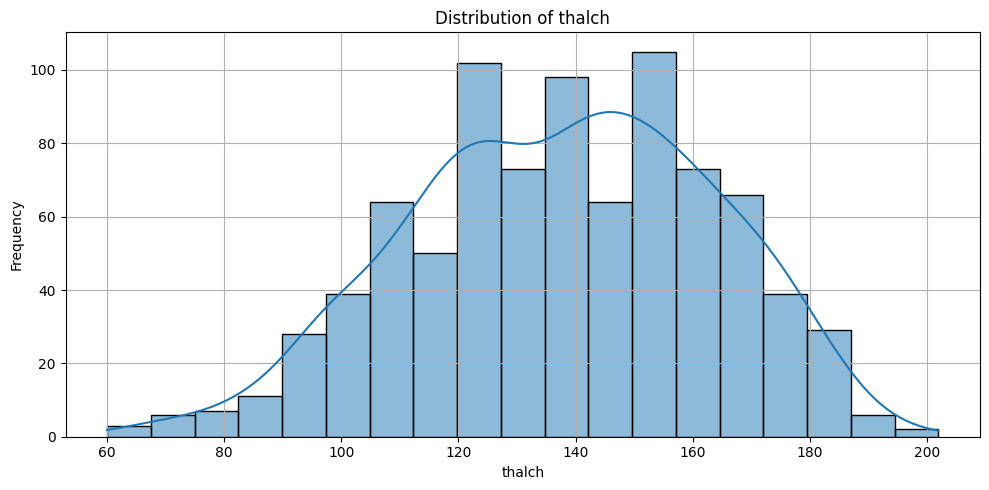


📊 Descriptive Statistics for 'exang':
count       865
unique        2
top       False
freq        528
Name: exang, dtype: object


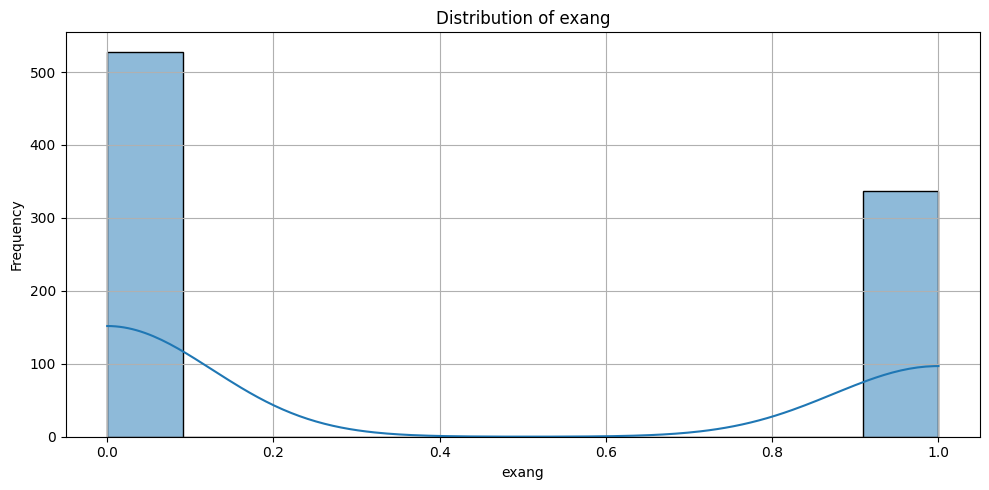


📊 Descriptive Statistics for 'oldpeak':
count    858.000000
mean       0.878788
std        1.091226
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64


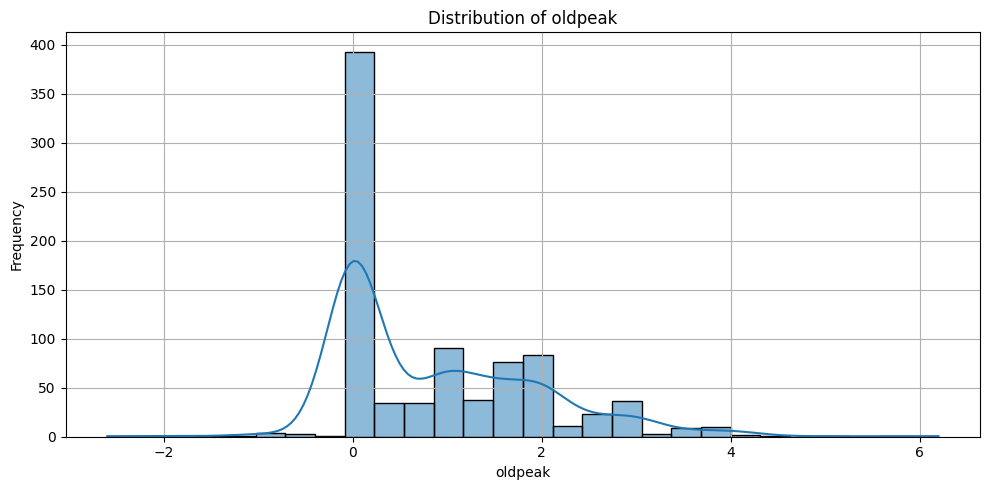


📊 Descriptive Statistics for 'slope':
count      611
unique       3
top       flat
freq       345
Name: slope, dtype: object


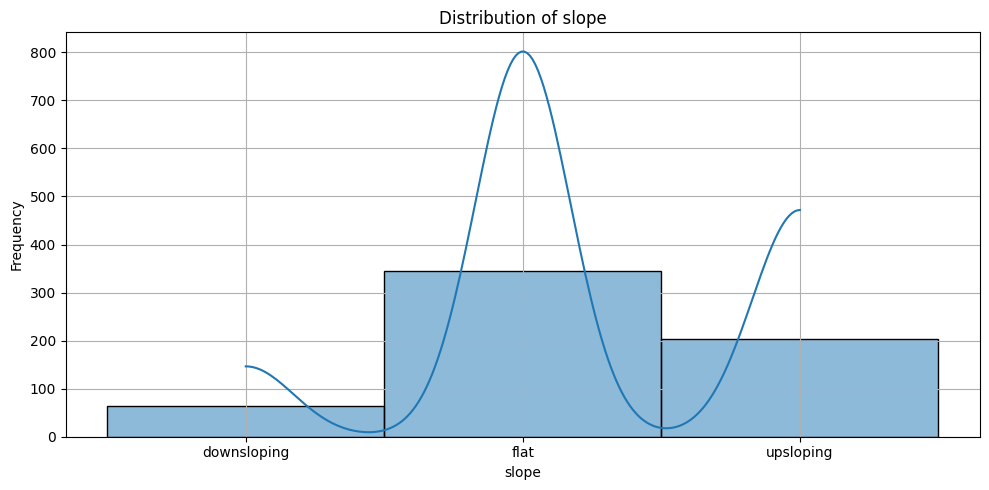


📊 Descriptive Statistics for 'ca':
count    309.000000
mean       0.676375
std        0.935653
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: ca, dtype: float64


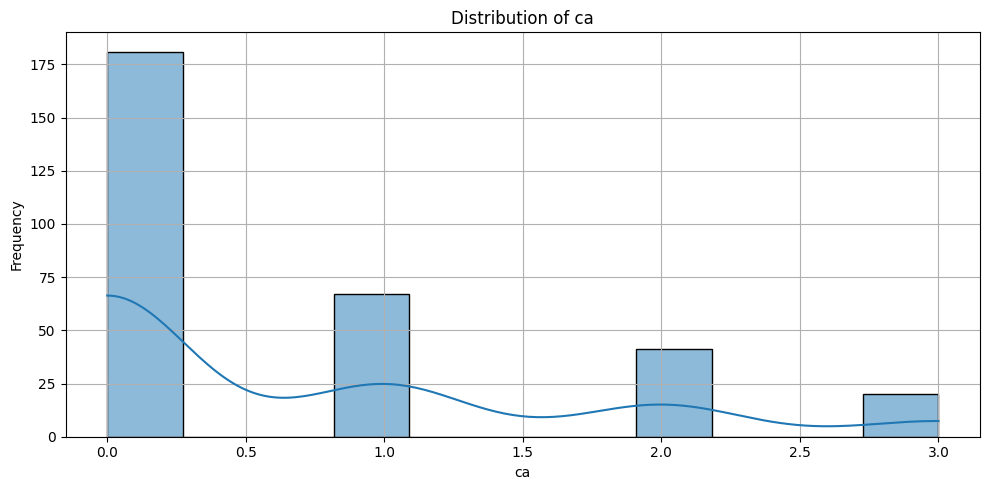


📊 Descriptive Statistics for 'thal':
count        434
unique         3
top       normal
freq         196
Name: thal, dtype: object


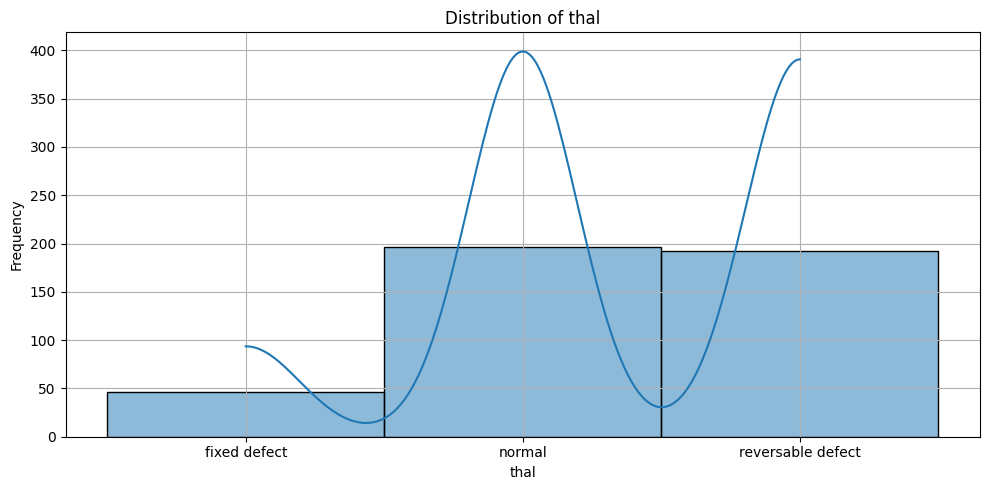

In [34]:
cols = ['fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

for col in cols:
    print(f"\n📊 Descriptive Statistics for '{col}':")
    print(df[col].describe())
    
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#### Binning to make BP Categories

In [35]:
# Define bins and labels
bins = [0, 90, 120, float('inf')]
labels = ['Low BP', 'Normal BP', 'High BP']

# Create a new column for BP categories
df['bp_category'] = pd.cut(df['trestbps'], bins=bins, labels=labels)

# Plot the distribution of BP categories
fig = px.histogram(df, x='bp_category', color='sex', title='BP Categories Distribution by Sex',
                   labels={'bp_category': 'Blood Pressure Category', 'sex': 'Sex'})
fig.show()

* High Blood Pressure (High BP) is the most common category among both sexes.

* A significantly larger number of males (445) fall into the High BP category compared to females.

* Normal Blood Pressure (Normal BP) is the second most frequent, with again more males than females.

* Low Blood Pressure (Low BP) cases are extremely rare or nearly absent in the dataset for both sexes.

* There is a clear gender disparity, with males more likely to have high or normal BP than females in this dataset.

---

## Dealing with missing values

In [36]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

ca             66.413043
thal           52.826087
slope          33.586957
fbs             9.782609
oldpeak         6.739130
bp_category     6.521739
trestbps        6.413043
thalch          5.978261
exang           5.978261
chol            3.260870
restecg         0.217391
id              0.000000
cp              0.000000
age             0.000000
sex             0.000000
dataset         0.000000
num             0.000000
dtype: float64

In [37]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'bp_category']

In [38]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [39]:
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [40]:
# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 9.402023121387282 

RMSE = 159.50307225433528 

R2 = 0.5019799245046577 

Missing Values chol : 3.26%
MAE = 44.72769662921348 

RMSE = 4066.465485955056 

R2 = 0.6778666150929125 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.31 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 65.76 accuracy

Missing Values thalch : 5.98%
MAE = 16.694046242774565 

RMSE = 468.04809884393063 

R2 = 0.31941903369359337 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.77 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5482616279069766 

RMSE = 0.5948812151162791 

R2 = 0.43325434276666064 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 68.29 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 69.35 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 74.71 accuracy

Missing Values bp_category : 6.52%


In [41]:
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num bp_category  
0       fixed defect    0     High BP  
1             normal    2     High BP  
2  reversable defect    1   Normal BP  
3             normal    0     High BP  
4             normal    0     High BP

## Dealing with Outliers

In [42]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through numeric columns and create box plots using Plotly
for col in numeric_cols:
    fig = px.box(df, y=col, title=f'Box Plot of {col}', color_discrete_sequence=px.colors.qualitative.Set1)
    fig.update_layout(yaxis_title=col, xaxis_title="Index")
    fig.show()

### removing outliers in trestbps and chol because it can not be 0

In [43]:
df[df['trestbps'] == 0]

df = df[df['trestbps']!= 0]

In [44]:
df[df['chol'] == 0]

df = df[df['chol']!= 0]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 748 entries, 0 to 919
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           748 non-null    int64   
 1   age          748 non-null    int64   
 2   sex          748 non-null    object  
 3   dataset      748 non-null    object  
 4   cp           748 non-null    object  
 5   trestbps     748 non-null    float64 
 6   chol         748 non-null    float64 
 7   fbs          748 non-null    object  
 8   restecg      748 non-null    object  
 9   thalch       748 non-null    float64 
 10  exang        748 non-null    object  
 11  oldpeak      748 non-null    float64 
 12  slope        748 non-null    object  
 13  ca           748 non-null    float64 
 14  thal         748 non-null    object  
 15  num          748 non-null    int64   
 16  bp_category  702 non-null    category
dtypes: category(1), float64(5), int64(3), object(8)
memory usage: 100.2+ KB


### Correlation Matrix

                id       age  trestbps      chol    thalch   oldpeak  \
id        1.000000  0.195458  0.172092  0.000126 -0.446726  0.197443   
age       0.195458  1.000000  0.272844  0.087176 -0.373541  0.313522   
trestbps  0.172092  0.272844  1.000000  0.083767 -0.139704  0.244485   
chol      0.000126  0.087176  0.083767  1.000000 -0.049878  0.049848   
thalch   -0.446726 -0.373541 -0.139704 -0.049878  1.000000 -0.274182   
oldpeak   0.197443  0.313522  0.244485  0.049848 -0.274182  1.000000   
ca       -0.004736  0.437230  0.128900  0.078256 -0.197781  0.357364   
num       0.197704  0.374962  0.198224  0.074110 -0.323576  0.537390   

                ca       num  
id       -0.004736  0.197704  
age       0.437230  0.374962  
trestbps  0.128900  0.198224  
chol      0.078256  0.074110  
thalch   -0.197781 -0.323576  
oldpeak   0.357364  0.537390  
ca        1.000000  0.616006  
num       0.616006  1.000000  


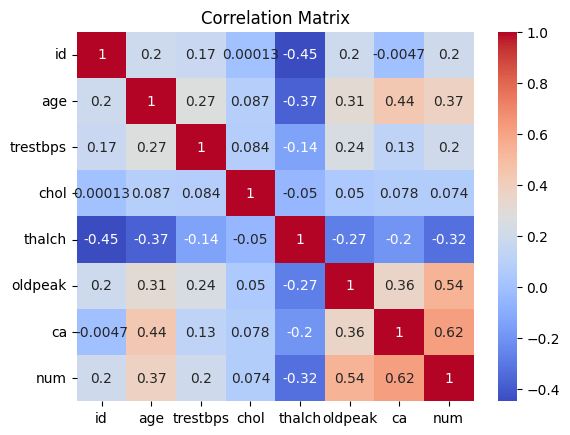

In [46]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Machine Learning

---

In [47]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',
       'bp_category'],
      dtype='object')

In [48]:
df['num'].value_counts()

num
0    391
1    203
3     69
2     63
4     22
Name: count, dtype: int64


**The target column is `num` which is predicted attribute. We will use this col to predict the heart disease. The unique values in this col are 0,1,2,3,4 which are:**

* 0 = No heart disease
* 1 = mild heart disease
* 2 = moderate heart disease
* 3 = severe heart disease
* 4 = critical heart disease


In [49]:
X = df.drop(columns=['id','dataset', 'bp_category','num'], axis=1)
y = df['num']

# Initialize a dictionary to store label encoders for each column
label_encoders = {}

# Loop through each column in X
for col in X.select_dtypes(include=['object', 'category']).columns:
    # Initialize and fit a label encoder for the column
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Save the label encoder for inverse transform later

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***ML models which we will use for multi-class classification:***
1. Logistic Regression
2. KNN
3. SVM
4. Decision Tree
5. Random Forest
6. XGboost
7. lightGBM
8. GradientBoost
9. AdaBoost

In [50]:
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
]


In [51]:
best_model = None
best_accuracy = 0.0

for name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    mean_accuracy = scores.mean()

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Model {name}")
    print(f"Cross Validation Accuracy: {mean_accuracy:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

print(f"Best Model: {best_model.named_steps['model'].__class__.__name__}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

Model Logistic Regression
Cross Validation Accuracy: 0.6189
Test Accuracy: 0.6333
Model KNN
Cross Validation Accuracy: 0.5067
Test Accuracy: 0.5800
Model SVM
Cross Validation Accuracy: 0.5134
Test Accuracy: 0.5533
Model Decision Tree
Cross Validation Accuracy: 0.5768
Test Accuracy: 0.5867
Model Random Forest
Cross Validation Accuracy: 0.6706
Test Accuracy: 0.6200
Model Gradient Boosting
Cross Validation Accuracy: 0.6588
Test Accuracy: 0.6467
Model XG Boost
Cross Validation Accuracy: 0.6438
Test Accuracy: 0.6000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 478, number of used features: 13
[LightGBM] [Info] Start training from score -0.660222
[LightGBM] [Info] Start training from score -1.249630
[LightGBM] [Info] Start t

## GradientBoostingClassifier gives best test accuracy of 64.67%
<hr>

## Hyperparameter Tuning

In [65]:
param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "model__C": [0.1, 1, 10],
            "model__solver": ["liblinear", "lbfgs"]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "model__n_neighbors": [3, 5, 7],
            "model__weights": ["uniform", "distance"],
            "model__algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
        }
    },
    "SVM": {
        "model": SVC(),
        "params": {
            "model__C": [0.1, 1, 10],
            "model__kernel": ["linear", "poly", "rbf", "sigmoid"]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "model__criterion": ["gini", "entropy"],
            "model__max_depth": [None, 10, 20, 30],
            "model__min_samples_split": [2, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "model__n_estimators": [50, 100, 200],
            "model__max_depth": [None, 10, 20, 30],
            "model__min_samples_split": [2, 5, 10]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(),
        "params": {
            "model__n_estimators": [50, 100, 200],
            "model__learning_rate": [0.01, 0.1, 0.2],
            "model__max_depth": [3, 5, 10]
        }
    },
    "XG Boost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "params": {
            "model__n_estimators": [50, 100, 200],
            "model__learning_rate": [0.01, 0.1, 0.2],
            "model__max_depth": [3, 5, 10]
        }
    },
    "LightGBM": {
				"model": LGBMClassifier(),
				"params": {
						"model__n_estimators": [50, 100, 200],
						"model__learning_rate": [0.01, 0.1, 0.2],
						"model__max_depth": [3, 5, 10]
				}
		},
    "AdaBoost": {
        "model": AdaBoostClassifier(),
        "params": {
            "model__n_estimators": [50, 100, 200],
            "model__learning_rate": [0.01, 0.1, 0.2]
        }
    }
}

model_results = {}
best_model_pipeline = None
best_accuracy = 0

for model_name, config in param_grids.items():
    model = config["model"]
    params = config["params"]

    # Create pipeline
    pipe = Pipeline([("model", model)])

    # Grid Search
    grid = GridSearchCV(pipe, param_grid=params, cv=5, scoring="accuracy")
    grid.fit(X_train, y_train)

    # Predictions
    y_pred = grid.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    model_results[model_name] = {
        "Accuracy": accuracy,
        "Best Parameters": grid.best_params_
    }

    # Save best model pipeline
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_pipeline = grid.best_estimator_
        best_model_name = model_name

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Best Parameters: {grid.best_params_}")
    print("-" * 30)

# Final Summary
print(f"🏆 Best Model: {best_model_name}")
print(f"📊 Metrics: {model_results[best_model_name]}")

# Save best model
best_model = best_model_pipeline


Model: Logistic Regression
Accuracy: 0.6867
Best Parameters: {'model__C': 0.1, 'model__solver': 'lbfgs'}
------------------------------
Model: KNN
Accuracy: 0.5533
Best Parameters: {'model__algorithm': 'auto', 'model__n_neighbors': 7, 'model__weights': 'uniform'}
------------------------------
Model: SVM
Accuracy: 0.6800
Best Parameters: {'model__C': 0.1, 'model__kernel': 'linear'}
------------------------------
Model: Decision Tree
Accuracy: 0.5467
Best Parameters: {'model__criterion': 'entropy', 'model__max_depth': 30, 'model__min_samples_split': 10}
------------------------------
Model: Random Forest
Accuracy: 0.6200
Best Parameters: {'model__max_depth': 30, 'model__min_samples_split': 5, 'model__n_estimators': 50}
------------------------------
Model: Gradient Boosting
Accuracy: 0.6267
Best Parameters: {'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 200}
------------------------------
Model: XG Boost
Accuracy: 0.6267
Best Parameters: {'model__learning_r

## After Hyperparameter tuning Logistic Regression gave best accuracy


In [66]:
# Predict on test set
y_pred = best_model.predict(X_test)
y_pred

array([1, 0, 0, 1, 3, 0, 0, 3, 1, 1, 3, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 3, 2, 0, 0,
       0, 3, 1, 0, 0, 1, 0, 1, 0, 0, 0, 3, 1, 0, 0, 0, 3, 3, 0, 0, 1, 0,
       0, 0, 1, 3, 1, 0, 0, 0, 1, 3, 3, 2, 0, 0, 3, 1, 1, 0, 3, 1, 0, 0,
       0, 3, 1, 3, 0, 3, 2, 1, 1, 0, 0, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

## Evaluating Model

In [67]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.6866666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        83
           1       0.46      0.55      0.50        31
           2       0.50      0.12      0.19        17
           3       0.39      0.47      0.42        15
           4       0.00      0.00      0.00         4

    accuracy                           0.69       150
   macro avg       0.44      0.41      0.40       150
weighted avg       0.66      0.69      0.66       150



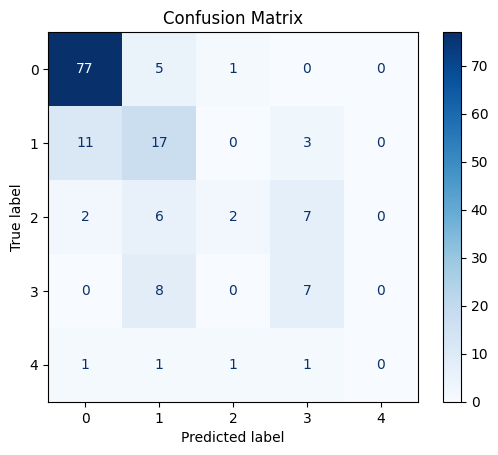

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=[0, 1, 2, 3, 4], cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [69]:
import joblib

# Save the trained AdaBoost model to a file
joblib.dump(best_model, 'logistic_heart_disease_model.pkl')

['logistic_heart_disease_model.pkl']